In [1]:
import pandas as pd
import numpy as np

In [2]:
# import the data into the datframe
df = pd.read_excel('Nashville_Housing_Data_for_Data.xlsx')

In [3]:
# print first five records in the datframe
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


In [4]:
df.dtypes

UniqueID                    int64
ParcelID                   object
LandUse                    object
PropertyAddress            object
SaleDate           datetime64[ns]
SalePrice                   int64
LegalReference             object
SoldAsVacant               object
OwnerName                  object
OwnerAddress               object
Acreage                   float64
TaxDistrict                object
LandValue                 float64
BuildingValue             float64
TotalValue                float64
YearBuilt                 float64
Bedrooms                  float64
FullBath                  float64
HalfBath                  float64
dtype: object

In [5]:
# Trim the column UniqueID
df.rename(columns={'UniqueID ':'UniqueID'}, inplace=True)

In [6]:
# drop nan values in datafram
df.dropna(axis=0, inplace=True)

In [7]:
# if ther is still null values
df.isnull().value_counts()

UniqueID  ParcelID  LandUse  PropertyAddress  SaleDate  SalePrice  LegalReference  SoldAsVacant  OwnerName  OwnerAddress  Acreage  TaxDistrict  LandValue  BuildingValue  TotalValue  YearBuilt  Bedrooms  FullBath  HalfBath
False     False     False    False            False     False      False           False         False      False         False    False        False      False          False       False      False     False     False       23705
dtype: int64

In [8]:
# convert data types to int
df['YearBuilt'] = df['YearBuilt'].astype('int64')
df['Bedrooms'] = df['Bedrooms'].astype('int64')

In [9]:
# check for duplicate records
df['UniqueID'].duplicated().sum()

0

In [10]:
df.describe()

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,23705.000000,2.370500e+04,23705.000000,2.370500e+04,2.370500e+04,2.370500e+04,23705.000000,23705.000000,23705.000000,23705.000000
mean,27584.465260,2.750023e+05,0.455836,6.904970e+04,1.730583e+05,2.447819e+05,1963.723139,3.094115,1.896984,0.286648
std,16549.621489,3.044420e+05,0.793932,1.021612e+05,1.935828e+05,2.723682e+05,26.385627,0.850667,0.955172,0.489565
min,1.000000,1.000000e+02,0.040000,1.000000e+02,1.400000e+03,1.260000e+04,1799.000000,0.000000,0.000000,0.000000
25%,13068.000000,1.250000e+05,0.190000,2.200000e+04,8.390000e+04,1.098000e+05,1948.000000,3.000000,1.000000,0.000000
50%,27214.000000,1.850000e+05,0.270000,2.990000e+04,1.176000e+05,1.548000e+05,1960.000000,3.000000,2.000000,0.000000
75%,42016.000000,3.249000e+05,0.450000,6.030000e+04,1.892000e+05,2.782000e+05,1983.000000,4.000000,2.000000,1.000000
max,56615.000000,1.075000e+07,47.500000,1.869000e+06,5.824300e+06,6.402600e+06,2017.000000,11.000000,10.000000,3.000000


In [11]:
# Split Ownername into frist name and last name
FirstName = []
LastName = []
for n in df['OwnerName'].tolist():
    if len(n.split(",")) == 1:
        FirstName.append(n)
        LastName.append(n)
    else:
        FirstName.append(n.split(",")[1])
        LastName.append(n.split(",")[0])
        
df['FirstName'] = FirstName
df['LastName'] = LastName

In [12]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,FirstName,LastName
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986,3,3.0,0.0,CYRENTHA LYNETTE,FRAZIER
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998,3,3.0,2.0,CHARLES & LESLIE,BONER
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987,4,3.0,0.0,JAMES E. & JOANNE,WILSON
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985,3,3.0,0.0,JAY K. & SUSAN E.,BAKER
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984,4,3.0,0.0,CHRISTOPHER M. & SAMANTHA C.,POST


In [13]:
# split property address into (city) then add a new column
city = []
for val in df['PropertyAddress'].tolist():
    city.append(val.split(",")[1].strip())
df['City'] = city


In [14]:
df.tail()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,FirstName,LastName,City
54210,51558,180 00 0 081.00,SINGLE FAMILY,"6640 HOLT RD, NASHVILLE",2016-07-08,258000,20160712-0071418,No,"CAHILL, DAVID W. II & MORYN","6640 HOLT RD, NASHVILLE, TN",...,111000.0,155800.0,268000.0,1978,4,2.0,0.0,DAVID W. II & MORYN,CAHILL,NASHVILLE
54211,34115,180 00 0 085.00,SINGLE FAMILY,"6608 HOLT RD, NASHVILLE",2015-07-27,339528,20150804-0077423,No,"MISRA, SANJEEV & YABKO, STACEY","6608 HOLT RD, NASHVILLE, TN",...,111000.0,141700.0,252700.0,1978,3,2.0,0.0,SANJEEV & YABKO,MISRA,NASHVILLE
54212,20731,180 00 0 094.00,SINGLE FAMILY,"6635 HOLT RD, NASHVILLE",2014-09-05,230000,20140905-0081621,No,"RALSTON, MARY DEE, IRREVOCABLE TRUST","6635 HOLT RD, NASHVILLE, TN",...,111500.0,210400.0,321900.0,1980,3,2.0,0.0,MARY DEE,RALSTON,NASHVILLE
54213,23447,180 00 0 114.00,SINGLE FAMILY,"6552 REDMOND LN, NASHVILLE",2014-11-24,237900,20141125-0108837,No,"MARTIN, KARA F. & SETH","6552 REDMOND LN, NASHVILLE, TN",...,59000.0,104100.0,163100.0,1985,3,3.0,0.0,KARA F. & SETH,MARTIN,NASHVILLE
54214,23448,180 00 0 230.00,SINGLE FAMILY,"105 HOLT HILLS RD, NASHVILLE",2014-11-12,259000,20141203-0110910,No,"AKERS, DOUGLAS P. & MELISSA W.","105 HOLT HILLS RD, NASHVILLE, TN",...,59000.0,194000.0,253000.0,2001,3,2.0,1.0,DOUGLAS P. & MELISSA W.,AKERS,NASHVILLE


In [15]:
# Number of properties sold in each city
df['City'].value_counts()

NASHVILLE         18675
ANTIOCH            1284
MADISON            1217
HERMITAGE          1025
OLD HICKORY         830
GOODLETTSVILLE      455
BRENTWOOD           182
WHITES CREEK         19
JOELTON              11
MOUNT JULIET          7
Name: City, dtype: int64

<AxesSubplot:>

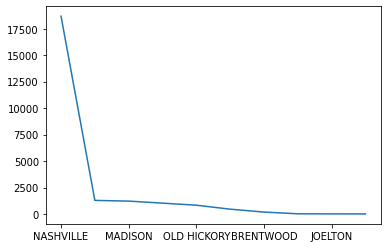

In [16]:
df['City'].value_counts().plot()

In [17]:
city_grp = df.groupby('City')

In [18]:
# Total Sale made in each city
city_grp['SalePrice'].sum()

City
ANTIOCH            169371582
BRENTWOOD           88939382
GOODLETTSVILLE      74716591
HERMITAGE          159610052
JOELTON              1575631
MADISON            168595600
MOUNT JULIET         1885800
NASHVILLE         5713366018
OLD HICKORY        138058171
WHITES CREEK         2811200
Name: SalePrice, dtype: int64

In [19]:
# group properties by city and year built
city_year_grp = df.groupby(['City','YearBuilt'])

In [20]:
# Sum of salePrice in individual cities at any given year
city_year_grp['SalePrice'].sum()

City          YearBuilt
ANTIOCH       1899         140000
              1925         193890
              1935          67450
              1936          68000
              1940         179000
                            ...  
WHITES CREEK  1985          94000
              1986         250000
              1988          90000
              1997         279900
              1999         197000
Name: SalePrice, Length: 576, dtype: int64

In [26]:
# All Properties in Nashville city
city_grp.get_group("NASHVILLE").head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,FirstName,LastName,City
392,56039,032 09 0 008.00,SINGLE FAMILY,"100 CRYSTAL CT, NASHVILLE",2016-10-13,118000,20161021-0111771,No,"REX RESIDENTIAL PROPERTY OWNER, LLC","100 CRYSTAL CT, NASHVILLE, TN",...,23000.0,82700.0,105700.0,1983,3,2.0,0.0,LLC,REX RESIDENTIAL PROPERTY OWNER,NASHVILLE
393,48725,032 09 0 011.00,SINGLE FAMILY,"1528 FALL DR, NASHVILLE",2016-05-27,145000,20160601-0055026,No,"HAYES, JENNIFER L.","1528 FALL DR, NASHVILLE, TN",...,23000.0,69300.0,92300.0,1983,3,2.0,0.0,JENNIFER L.,HAYES,NASHVILLE
394,41933,032 09 0 021.00,SINGLE FAMILY,"1609 FALL DR, NASHVILLE",2015-12-01,158000,20151204-0122562,No,"KIMBROUGH, TONYA S.","1609 FALL DR, NASHVILLE, TN",...,23000.0,97400.0,120400.0,1987,3,2.0,0.0,TONYA S.,KIMBROUGH,NASHVILLE
395,29472,032 09 0 022.00,SINGLE FAMILY,"1605 FALL DR, NASHVILLE",2015-04-15,146100,20150424-0036844,No,"MORROW, BARBARA","1605 FALL DR, NASHVILLE, TN",...,23000.0,102100.0,125100.0,1987,3,2.0,0.0,BARBARA,MORROW,NASHVILLE
396,33029,032 09 0 035.00,SINGLE FAMILY,"1708 FALL DR, NASHVILLE",2015-06-09,106900,20150610-0054916,No,"EDWARDS, JONATHAN L. & CANDRELIQUE J.","1708 FALL DR, NASHVILLE, TN",...,23000.0,74300.0,97300.0,1987,3,2.0,0.0,JONATHAN L. & CANDRELIQUE J.,EDWARDS,NASHVILLE


In [29]:
# Get all properties sold as vacant
sold_vacant = df.groupby('SoldAsVacant').get_group('Yes')
sold_vacant.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,FirstName,LastName,City
125,2047,018 16 0 136.00,VACANT RES LAND,"335 MONCRIEF AVE, GOODLETTSVILLE",2013-04-12,20000,20130416-0037646,Yes,"LEWIS, PHILLIP EDWARD JR. & ERICA D.","335 MONCRIEF AVE, GOODLETTSVILLE, TN",...,26400.0,308300.0,334700.0,2014,3,2.0,0.0,PHILLIP EDWARD JR. & ERICA D.,LEWIS,GOODLETTSVILLE
222,22721,026 01 0 069.00,VACANT RESIDENTIAL LAND,"141 TWO MILE PIKE, GOODLETTSVILLE",2014-10-27,59800,20141031-0100471,Yes,"SHACKLEFORD, MICHAEL C., JR.","141 TWO MILE PIKE, GOODLETTSVILLE, TN",...,21100.0,121600.0,142700.0,2015,3,2.0,0.0,MICHAEL C.,SHACKLEFORD,GOODLETTSVILLE
226,22722,026 01 0 153.00,SINGLE FAMILY,"143 TWO MILE PIKE, GOODLETTSVILLE",2014-10-27,59800,20141031-0100471,Yes,"MEADOR, ERIC M.","143 TWO MILE PIKE, GOODLETTSVILLE, TN",...,21100.0,121600.0,142700.0,2015,3,2.0,0.0,ERIC M.,MEADOR,GOODLETTSVILLE
500,12405,033 04 0 017.00,VACANT RES LAND,"128 DRAPER DR, GOODLETTSVILLE",2014-02-26,40000,20140228-0017471,Yes,"PEAGRAM, RAYMOND M. & MARY E.","128 DRAPER DR, GOODLETTSVILLE, TN",...,30800.0,261100.0,291900.0,2014,3,2.0,0.0,RAYMOND M. & MARY E.,PEAGRAM,GOODLETTSVILLE
1297,29490,041 06 0 041.00,VACANT RESIDENTIAL LAND,"1416 FINNLAND DR, NASHVILLE",2015-04-30,19500,20150505-0040745,Yes,"MILES, JAMES & JOYCE","1416 FINNLAND DR, NASHVILLE, TN",...,20000.0,122500.0,142500.0,2016,3,2.0,0.0,JAMES & JOYCE,MILES,NASHVILLE


In [30]:
# Relationship between sale price and number of Bedrooms
df[['SalePrice', 'Bedrooms']].corr()

,SalePrice,Bedrooms
SalePrice,1.000000,0.376122
Bedrooms,0.376122,1.000000


In [32]:
# Relationship between LandValue and Building value
df[['LandValue','BuildingValue']].corr()

,LandValue,BuildingValue
LandValue,1.000000,0.617855
BuildingValue,0.617855,1.000000


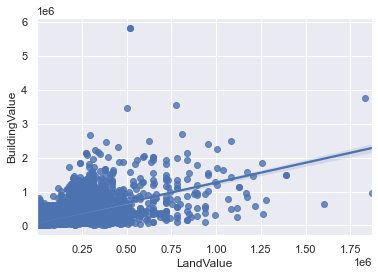

In [33]:
# Regression plot for land value against building value
import seaborn as sns; sns.set_theme(color_codes=True)
tips = df[['LandValue','BuildingValue']]
ax = sns.regplot(x="LandValue", y="BuildingValue", data=tips)